In [1]:
from ipywidgets import interact,interactive,fixed,interact_manual

In [2]:
import ipywidgets as widgets

In [3]:
from IPython.display import display

In [4]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


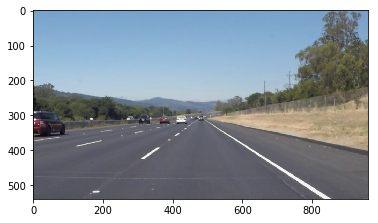

In [5]:
#reading in an imageg
#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
image = mpimg.imread('test_images/solidWhiteRight.jpg')


#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image) 

In [6]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

length=1;
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    # Draw left lane
    for line in lines:
        for x1,y1,x2,y2 in line:
            dx = x1-x2+0.0
            dy = y1-y2+0.0
            if(  (((dx)**2 + (dy)**2) >= length**2) and dy != 0.0 and (dx/dy < -0.5) ): # & dy != 0.0 and (dx/dy < -0.5) and x1 > 600 
                #print(((x1-x2+0.0)**2 + (y1-y2+0.0)**2),x1,y1,x2,y2,dx,dy)
                # draw from previous line end to current line start
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

    # Draw right lane
    for line in lines:
        for x1,y1,x2,y2 in line:
            dx = x1-x2+0.0
            dy = y1-y2+0.0
            if(  (((dx)**2 + (dy)**2) >= length**2) and dy != 0.0 and (dx/dy > 0.5) ): # & dy != 0.0 and (dx/dy < -0.5) and x1 > 600 
                #print(((x1-x2+0.0)**2 + (y1-y2+0.0)**2),x1,y1,x2,y2,dx,dy)
                # draw from previous line end to current line start
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)
                
                
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

In [7]:
grayImage = grayscale(image)

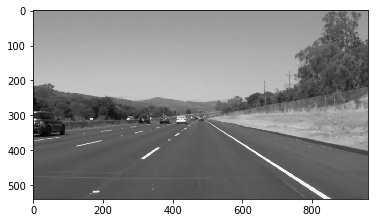

In [8]:
plt.imshow(grayImage, cmap='gray')

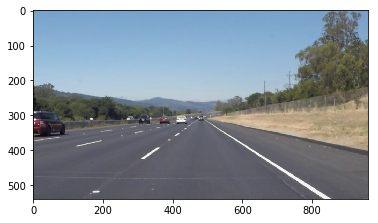

In [9]:
    plt.imshow(image)

In [10]:
def showCanny(low_threshold,high_threshold,kernel,rho,theta,threshold,min_line_len,max_line_gap,lp):
    global length
    length=lp
    result=procCanny(image,low_threshold,high_threshold,kernel,rho,theta,threshold,min_line_len,max_line_gap)
    # Plot the lines
    plt.imshow(result, cmap='gray')
    
def procCanny(image1,low_threshold,high_threshold,kernel,rho,theta,threshold,min_line_len,max_line_gap):
    # Select on colour
    # white as ratio among channels    
    # Yellow as ratio among channels    
    red_threshold = 200
    green_threshold = 200
    blue_threshold = 200
    rgb_threshold_white = [red_threshold, green_threshold, blue_threshold]
    
    red_threshold = 200
    green_threshold = 200
    blue_threshold = 50
    rgb_threshold_yellow = [red_threshold, green_threshold, blue_threshold]

    colorMaskWhite = (image1[:,:,0] < rgb_threshold_white[0]) | \
                    (image1[:,:,1] < rgb_threshold_white[1]) | \
                    (image1[:,:,2] < rgb_threshold_white[2])

#     colorMaskWhite = (abs(image1[:,:,0] - abs(image1[:,:,1]) > 100) | \
#                     (abs(image1[:,:,1] - abs(image1[:,:,2]) > 100)) 
    
    colorMaskYellow = (abs(image1[:,:,0] - rgb_threshold_yellow[0]) > 100) | \
                    (abs(image1[:,:,1] - rgb_threshold_yellow[1]) > 100) | \
                    (abs(image1[:,:,2] - rgb_threshold_yellow[2]) > 100)
    localImage = np.copy(image1)#[colorMask]
    localImage[colorMaskYellow & colorMaskWhite ] = [0,0,0]  
# #     return localImage
    
    # Grayscale    
    localImage = grayscale(localImage)

    # Smooth
    localImage = gaussian_blur(localImage,int(kernel))
    
    # Edge detect
    localImage = canny(localImage,low_threshold,high_threshold)

    # Hough Lines
    localImage = hough_lines(localImage,int(rho),int(theta), int(threshold), int(min_line_len), int(max_line_gap))
    
    # Overlay
    localImage = weighted_img(localImage,image1,0.3)
    
    return localImage
    

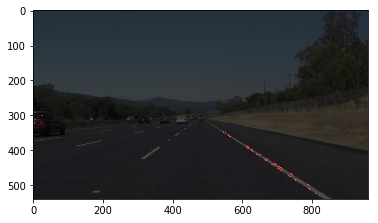

In [11]:
y=interact(showCanny,
           low_threshold=(0.1,255),
           high_threshold=(0.1,255),
           kernel=[3,5,7,9,11,21,31,41],
           rho=(1,3) ,#[1,2,3,4,5],
           theta=(1,3) ,#[1,2,3,4,5],
           threshold=[1,2,3,4,5],
           min_line_len=[1,2,3,4,8,9,10],
           max_line_gap=[0,1,2,3,4,5,6,7,8,9,10],
           lp=(-10.0,10.0)) 

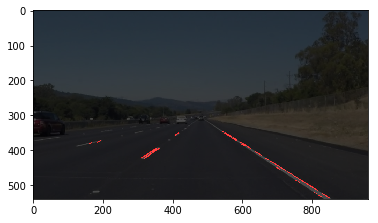

In [12]:
## <= 0
length=10
result=procCanny(image,38,211,3,1,1,3,3,2)

plt.imshow(result)


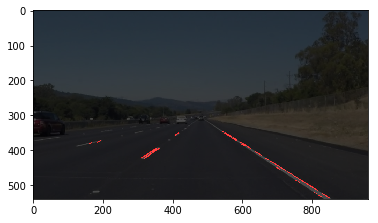

In [13]:
## > 0 
length=10
result=procCanny(image,38,211,3,1,1,3,3,2)

plt.imshow(result)


In [14]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

def process_image(image1):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    #result=procCanny(image1,10.55,240.55,3,2,2,1,1,1)    
    result=procCanny(image1,38,211,3,1,1,3,3,2)    
    return result

In [15]:
length=10
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)
#clip1.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:31<00:00,  6.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 12.6 s, sys: 1.08 s, total: 13.7 s
Wall time: 34.5 s


In [16]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [48]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [17]:
length=10
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/challenge.mp4")
challenge_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time challenge_clip.write_videofile(challenge_output, audio=False)
#clip1.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|██████████| 251/251 [01:20<00:00,  3.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 29.1 s, sys: 8.29 s, total: 37.4 s
Wall time: 1min 25s


In [18]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

In [ ]:
## Find colors for lines
# Get region right in front of car

# Find lines

# Find colours

## Find lines right in front of car by restricting to long lines
# Use colour sets to filter entire image

# Find lines again with settings that only work for 'long' lines

## Find entire lanes by finding lines that are 'in line' with long lines in front of car
# Find lines again for lines that are 'short'

# Use only lines that are 'in line' with long lines 

# Now find lines that are very long ? / draw line through items that are selected 


In [ ]:
## find and draw lines

# Find lines (smooth, canny, length, left/right, extrapolate)

# Overlay lines with image ('add')

#

In [ ]:
# Extrapolate max/min
# filter lines on 'left' and 'right'
# find max and min line locations
# Draw line from one end to other

# Extrapolate by joining all lines
# filter 'left' and 'right'
# sort on x and / y
# where there are gaps, mark 'last endpoint' and first 'startpoint'
# Draw lines, and where there are last and first points draw them as well, afterward from lastFirst endpoint list
#  last first points are found: after sort, if x > prevX and y > prevY (should tranform axis) with 'dot' product

# Draw lines, create currentx and currenty, and only advance when new lines are > than x and y, setting previous.
# When sorting lines, first sort start / endpoints so start is always > end
# Then sort lines using start points (First co-ordinate)
# Then walk through and find list of points and previous points

# Find car lanes project documentation
My approach has been to use a combination of colour, shape (lines, edges) and location (the region in front of the car) to isolate lane lines in the image.

## Colour
Colour was selected to be White and Yellow so that two types of lane lines may be identified.
The colour was identified using the RGS channels of the input image.
For white, it was assumed that if all the channels are above 200 at the same time a pixel that is the colour white was identified.

Yellow was selected by makeing sure that the R and G channels are close to each other and that the B channel is close to zero

## Image gradient
Imgage gradient is used to find edges between objects using Canny edge detection
The gradient is smoothed using Gaussian filtering to prevent spurious lines from appearing.

## Shape
Lines that are almost vertical are selected and straight. This set of lines constitute lane markings and excludes
many other artifacts.

## Location
The area in front of the vehicle is selected as a region of interest since the camera is mounted in a fixed position with a forward 'view' of the where the vehicle is travelling. The assumption that lane markings will be in the middle of the image toward the bottom remains therefore valid for most situations.

## Filter lines
The lines that were found this way have also been filtered to only show lines that have a length longer than 10 pixels to exclude other lines that artifacts mey produce.

Then lines where also filtered on line 'angle' by taking the ration of deltaX and deltaY.

This allowed me to seperate the the left hand line from the right hand line.


## Combining and extrapolating lines found
Lines are extrapolated or 'combined' by taking the minimum and maximum x and y values for each line, and then drawing a straight line through those.
